# validation

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]= (10,2)
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings("ignore")

In [63]:
lst = ['washing_machine',"ac1",'ac2',"fridge",'tv']
path = "d:/NILM/Data_files/Parquet/Appliances12_06-21_06/"
l = []
for i in range(len(lst)):
    df = pd.read_parquet(f"{path}{lst[i]}.parquet")
    print(lst[i],":",len(df))
    df.set_index(['timestamp'],inplace=True ,drop=True)
    l.append(df)


washing_machine : 2847
ac1 : 46207
ac2 : 20213
fridge : 646625
tv : 127913


In [64]:
df = l[0]

In [65]:
df_wm = pd.DataFrame({'power': (df['voltage'] * df['current'] * df['PF']).round(3)})
df_wm.describe()

,power
count,2847.000000
mean,197.611532
std,41.802713
min,2.148000
25%,194.493000
50%,203.226000
75%,214.078500
max,268.303000


<Axes: xlabel='timestamp'>

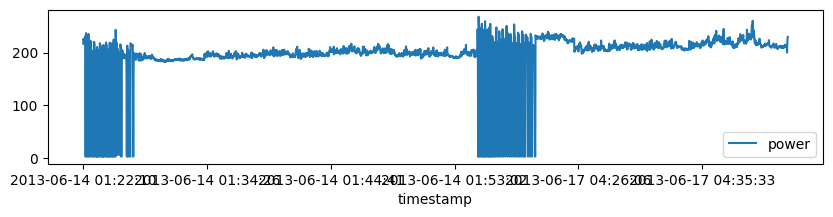

In [66]:
df_wm.plot()

In [67]:
df_wm.reset_index(inplace=True)
df_wm['timestamp'] = pd.to_datetime(df_wm['timestamp'])

In [68]:
df_wm.set_index(['timestamp'],drop=True, inplace=True)

In [69]:
df= df_wm.resample(rule="1S").mean()

In [70]:
df

,power
timestamp,
2013-06-14 01:22:10,217.190
2013-06-14 01:22:11,225.955
2013-06-14 01:22:12,223.326
2013-06-14 01:22:13,225.188
2013-06-14 01:22:14,221.805
...,...
2013-06-17 04:41:17,214.393
2013-06-17 04:41:18,200.143
2013-06-17 04:41:19,217.602


In [71]:
df.isna().sum()

power    268305
dtype: int64

<Axes: xlabel='timestamp'>

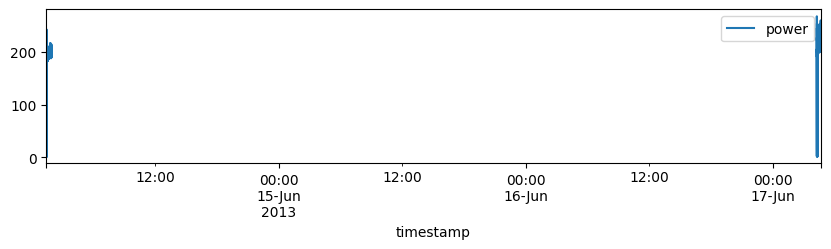

In [72]:
df.plot()

In [73]:
date = "2023-06-14"
start_datetime = '2013-06-14 00:00:00'
end_datetime = '2013-06-14 01:25:00'

# Filter data within the specified datetime range
filtered_data = df[(df.index >= start_datetime) & (df.index <= end_datetime)]
# filtered_data.fillna(value=0, inplace=True)
filtered_data
# df_wm['power'].plot()


,power
timestamp,
2013-06-14 01:22:10,217.190
2013-06-14 01:22:11,225.955
2013-06-14 01:22:12,223.326
2013-06-14 01:22:13,225.188
2013-06-14 01:22:14,221.805
...,...
2013-06-14 01:24:56,NaN
2013-06-14 01:24:57,215.089
2013-06-14 01:24:58,213.927


<Axes: xlabel='timestamp'>

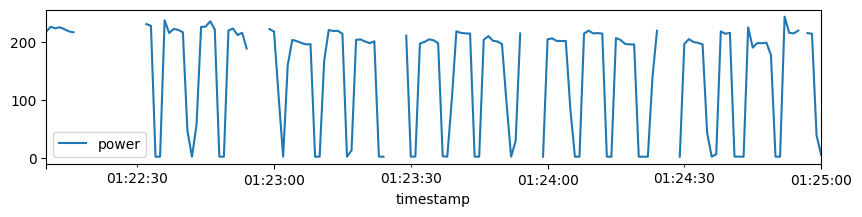

In [74]:
filtered_data.plot()

Text(0.5, 1.0, 'interpolate')

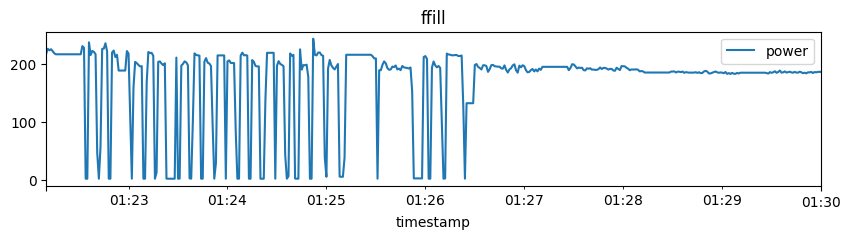

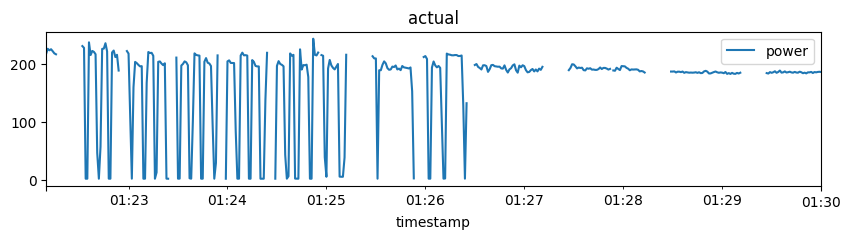

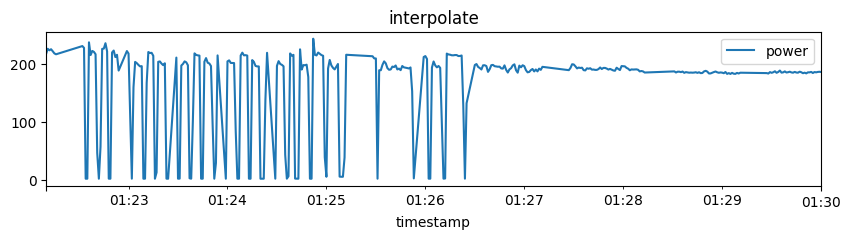

In [76]:
date = "2023-06-14"
start_datetime = '2013-06-14 00:00:00'
end_datetime = '2013-06-14 01:30:00'

# Filter data within the specified datetime range
filtered_data = df[(df.index >= start_datetime) & (df.index <= end_datetime)]
# filtered_data.fillna(value=0).plot()
filtered_data.ffill().plot()
plt.title("ffill")
# filtered_data.rolling(window=3).mean().plot()
# plt.title("rolling")
filtered_data.plot()
plt.title("actual")
filtered_data.interpolate().plot()
plt.title("interpolate")

# df_wm['power'].plot()


<Axes: xlabel='timestamp'>

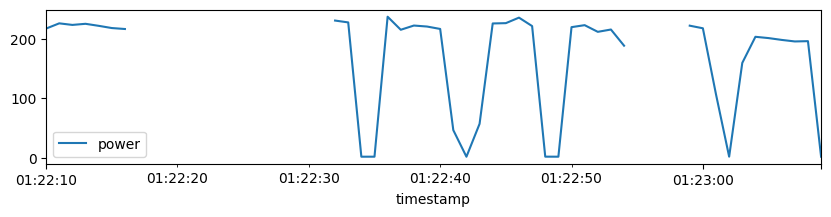

In [59]:
filtered_data.head(60).plot()

In [ ]:
filtered_data.fillna(value=0, inplace=True)
filtered_data.plot()

In [ ]:
filtered_data.iloc[160:220]

In [ ]:
for i in range((len(df.columns))):
    if (df[df.columns[i]].nunique()>1) & (df[df.columns[i]].isna().sum()==0):
        result=adfuller(df[df.columns[i]])
        if result[1]< 0.05:
            print(df.columns[i],"stationary",result[1])
            pass
        else:
            print(df.columns[i],"not stationary",result[1])
    else:
        print(df.columns[i])

In [60]:

result = adfuller(df, autolag='AIC')

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])
if result[1] <= 0.05:
    print("Reject the null hypothesis; the data is stationary.")
else:
    print("Fail to reject the null hypothesis; the data is non-stationary.")


MissingDataError: exog contains inf or nans